In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
 
    path_to_file = '/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2
/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2


In [3]:
%cd ../../../../../../
!ls

/
bin	 datalab  home	 lib64	opt   run   swift	       tmp    var
boot	 dev	  lib	 media	proc  sbin  sys		       tools
content  etc	  lib32  mnt	root  srv   tensorflow-1.15.2  usr


In [4]:
!git clone https://github.com/xinntao/BasicSR.git
%cd BasicSR
!pip install -r requirements.txt
!python3 setup.py develop
!python setup.py develop --no_cuda_ext

Cloning into 'BasicSR'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 4115 (delta 8), reused 11 (delta 4), pack-reused 4093
Receiving objects: 100% (4115/4115), 2.41 MiB | 32.46 MiB/s, done.
Resolving deltas: 100% (2467/2467), done.
/BasicSR
     |████████████████████████████████| 10.6MB 7.4MB/s 
     |████████████████████████████████| 194kB 61.1MB/s 
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision import datasets, transforms, models
from PIL import Image 
import matplotlib.pyplot as plt
device=torch.device('cuda')
!pwd
from basicsr.models.archs.srresnet_arch_d import MSRResNet

/content


In [2]:

model = MSRResNet(
    num_in_ch=3, num_out_ch=3).to(device)

model.to(device)



MSRResNet(
  (conv_first): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (body): Sequential(
    (0): ResidualBlockNoBN(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (1): ResidualBlockNoBN(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (2): ResidualBlockNoBN(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (3): ResidualBlockNoBN(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (re

In [3]:
sum(p.numel() for p in model.parameters())

1517571

In [4]:
import math
import cv2
def compute_psnr(img1, img2):
  img1 = img1.astype(np.float64) / 255.
  img2 = img2.astype(np.float64) / 255.
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
      return "Same Image"
  return 10 * math.log10(1. / mse)


In [5]:
train_dir = "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Train/LR_x4"
train_target = "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Train/HR"



####################################################
val_dir = "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Val/LR_x4"
val_target = "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Val/HR"
bs = 1
workers = 0

def train_preprocess(datadir):
    test_transforms = transforms.Compose([
        #can try random crop with at size of the shorter edge
        #transforms.RandomVerticalFlip(p=0.1),
        transforms.ToTensor() 
        ]) 

    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
 
    testloader = torch.utils.data.DataLoader(test_data,
                    batch_size=bs,shuffle=False,    # use custom collate function here
                       num_workers=workers)
    return testloader
 

def preprocess(datadir):
    test_transforms = transforms.Compose([
        #can try random crop with at size of the shorter edge
        #transforms.RandomCrop(16),
        transforms.ToTensor() 
        ]) 

    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
 
    testloader = torch.utils.data.DataLoader(test_data,
                    batch_size=bs,shuffle=False,    # use custom collate function here
                       num_workers=workers)
    return testloader
 
trainloader = train_preprocess(train_dir)
targetloader = preprocess(train_target)
val_loader =  preprocess(val_dir)
val_targetloader = preprocess(val_target)

In [6]:
def val_stage1(val_loader, val_targetloader):

  total_psnr  = 0 
 
  for i, (img, target) in enumerate(zip(val_loader , val_targetloader)):
    #if i==0:
      model.eval()  
      with torch.no_grad():    
        input, target_data = img[0].to(device), target[0].to(device)
        output=model(input)
        #output=G(output)


        output_array = output[0].detach().cpu().permute(1,2,0).numpy() *255
        target_array = target_data[0].detach().cpu().permute(1,2,0).numpy() *255
        psnr_base = compute_psnr(output_array, target_array)
        if i% 20==0:
          print(i,'PSNR for validation image: ', psnr_base)
 
        total_psnr  = total_psnr  +  psnr_base
    

  ave_psnr = total_psnr/(i+1)
  print('Average PSNR for image: ', ave_psnr)
  return ave_psnr

  

0 0.04134572669863701 PSNR for image:  23.82663660247788
100 0.056019702926278114 PSNR for image:  20.657218245294523
200 0.03634973824955523 PSNR for image:  24.95684040077604
300 0.02243862661998719 PSNR for image:  28.705737055614602
400 0.025061125634238124 PSNR for image:  29.273333333794398
0 PSNR for validation image:  28.573642869352756
20 PSNR for validation image:  27.65353962205382
40 PSNR for validation image:  26.954263933936428
60 PSNR for validation image:  21.78283136948737
Average PSNR for image:  27.522879669988452
0 26.792278467665355 0.03202177008196304 time:  9.004085330168406
0 0.0383481013122946 PSNR for image:  24.339009548734552
100 0.04436615761369467 PSNR for image:  21.97724776565043
200 0.03308591200038791 PSNR for image:  25.591419606982942
300 0.02265334443654865 PSNR for image:  28.57012549619335
400 0.025082610081881285 PSNR for image:  29.281556330915812
0 PSNR for validation image:  28.665248957315647
20 PSNR for validation image:  28.690506746907374


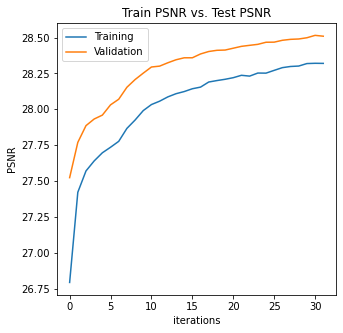

In [9]:
lr = 0.0002
beta1 = 0.5
from torch import nn, optim
mse_criterion  = nn.MSELoss()
l1_criterion  = nn.L1Loss()
model = MSRResNet(
    num_in_ch=3, num_out_ch=3).to(device)

model.to(device)

optimizer = optim.Adam(model.parameters(), lr=lr, betas=(beta1, 0.999))
import numpy as np
import time
import os
from torchvision.utils import save_image
num_epochs = 100
 
psnr_train_epoch  = []
psnr_valid_epoch  = []
running_loss = []
for epoch in range(num_epochs):

  psnr_ratio=0
  total_loss = 0
  start = time.time()
  for i, (img, target) in enumerate(zip(trainloader, targetloader)):
    #if i==0: 
      input, target_data = img[0].to(device), target[0].to(device)
      output=model(input)
      model.zero_grad() 
      mse_loss = mse_criterion(output, target_data)
      l1_loss =  l1_criterion(output, target_data)
 
      mse_loss.backward(retain_graph=True)
      l1_loss.backward(retain_graph=True)
      LOSS = (mse_loss.detach().item() + l1_loss.detach().item()) 
      total_loss = total_loss + LOSS
      optimizer.step()   
      model.zero_grad()

      output_array = output[0].detach().cpu().permute(1,2,0).numpy() *255
      target_array = target_data[0].detach().cpu().permute(1,2,0).numpy() *255
      psnr_base = compute_psnr(output_array, target_array)
      psnr_ratio=psnr_ratio+ psnr_base
         
      if i%100 ==0:
          print(i, LOSS,'PSNR for image: ', psnr_base)

      ############################plot#################
      if psnr_base<0:
        print(i, LOSS,'PSNR for image: ', psnr_base)
        fig = plt.figure(figsize=(10, 10))
        ax1 = fig.add_subplot(2, 2, 1)
        ax1.title.set_text('Output')
        ax1.axis('off')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.title.set_text('Ground Truth')
        ax2.axis('off')
        
        
        out_img = np.clip(output[0].detach().cpu().permute(1,2,0).numpy(), 0, 1)
        tgt_img = np.clip(target_data[0].detach().cpu().permute(1,2,0).numpy(), 0, 1)
        ax1.imshow(out_img)
        ax2.imshow(tgt_img)
      ######################################################
  ave_loss = total_loss/(i+1)
  running_loss.append(ave_loss) 

  ave_psnr = psnr_ratio/(i+1)
  val_psnr = val_stage1(val_loader, val_targetloader)

  psnr_train_epoch.append(ave_psnr)
  psnr_valid_epoch.append(val_psnr)

  
  stop = time.time()
  duration = stop-start
  print(epoch, ave_psnr, ave_loss, 'time: ', duration/60)
  if epoch>0 and psnr_valid_epoch[epoch] <psnr_valid_epoch[epoch-1]:
    torch.save(model, "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/results/test20_mse_Loss.pth")
    break
  if epoch==num_epochs-1:
    torch.save(model, "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/results/test20_mse_Loss.pth")

plt.figure(figsize=(5,5))
plt.title("Train PSNR vs. Test PSNR")
plt.plot(psnr_train_epoch,label="Training") 
plt.plot(psnr_valid_epoch,label="Validation") 
plt.xlabel("iterations")
plt.ylabel("PSNR")
plt.legend()
    
plt.savefig('test20_mse_Loss', dpi=300, bbox_inches='tight')
plt.show()
        
  
      ########### process directly from tensor also can ########################
      #model(img_tensor_data)

In [11]:
###############for submission #########################################
from torchvision.utils import save_image
import glob
import os
source_dir =  "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Test/LR/LR/"
test_dir = "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Test/LR/"
save_path =  "/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/data/Test/HR/new"
model = MSRResNet(
    num_in_ch=3, num_out_ch=3).to(device)
print(sum(p.numel() for p in model.parameters()))
stage1_model = torch.load("/content/gdrive/My Drive/AI6126 Advanced CV Assignment/Project 2/results/test20_mse_Loss.pth")
testloader = preprocess(test_dir)
 
def inference(testloader):
  for i, (img, f) in enumerate(zip(testloader,sorted(os.listdir(source_dir)))):
        img_name = f
        input  = img[0].to(device) 
        output=stage1_model(input)
        #output=G(output)
        save_image(output[0], os.path.join(save_path, img_name))
        if i %20==0:
          print(img_name, 'saved!')
                  
 

  
inference(testloader)

1517571
0001.png saved!
0021.png saved!
0041.png saved!
0061.png saved!
